In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score, cohen_kappa_score

from utils.loader import FactoryLoader
from utils.ml import MLPipeline
from utils.preprocessing import PreprocessingFactory
from utils.feature_extraction import *
from utils.utils import *

VAL_PATH = r"C:\Users\gimes\Src\repos\CADx-Project\dataset\multiclass\val"
TRAIN_PATH = r"C:\Users\gimes\Src\repos\CADx-Project\dataset\multiclass\train"

In [2]:
percent = 100
random = False
batch_size = 48

# Initialize the FactoryLoader
factory = PreprocessingFactory()
factory.gaussian_smoothing(5)
factory.clahe(clip_limit=1.5)
factory.pad2square(fill=np.nan)
factory.resize((150,150))
factory.hair_removal()
factory.normalize2float()

factory_loader = FactoryLoader(path=VAL_PATH, batch_size=batch_size, factory=factory, percentage=percent, shuffle=random)

# Create the feature extraction pipeline strategy and add desired features
strategy = FeatureExtractionStrategy()

strategy.add_extractor(GradientExtractor())   # Add variance feature

# strategy.add_extractor(MeanExtractor())  # Add mean feature
# strategy.add_extractor(StdExtractor())   # Add standard deviation feature
strategy.add_extractor(VarExtractor())   # Add variance feature
strategy.add_extractor(ColorMomentsExtractor())   # Add color moments feature


# strategy.add_extractor(MeanExtractor("lab"))  # Add mean feature
# strategy.add_extractor(StdExtractor("lab"))   # Add standard deviation feature
strategy.add_extractor(VarExtractor("lab"))   # Add variance feature
strategy.add_extractor(ColorMomentsExtractor("lab"))   # Add color moments feature

# strategy.add_extractor(MeanExtractor("hsv"))  # Add mean feature
# strategy.add_extractor(StdExtractor("hsv"))   # Add standard deviation feature
strategy.add_extractor(VarExtractor("hsv"))   # Add variance feature
strategy.add_extractor(ColorMomentsExtractor("hsv"))   # Add color moments feature

strategy.add_extractor(LBPExtractor(radius=1, n_points=64))
strategy.add_extractor(LBPExtractor(radius=2, n_points=64))
strategy.add_extractor(LBPExtractor(radius=3, n_points=64))

strategy.add_extractor(GLCMExtractor(properties=['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation',]))

pipeline = MLPipeline(dataset_path=TRAIN_PATH, preprocessing_factory=factory, feature_strategy=strategy, classifiers=[], percentage=percent, verbose=True, shuffle=random, batch_size=batch_size)

INFO:utils.ml:MLPipeline initialized with dataset path: C:\Users\gimes\Src\repos\CADx-Project\dataset\multiclass\train
INFO:utils.ml:Preprocessing steps


In [3]:
pipeline.feature_matrix = None
pipeline.run_feature_extraction()

INFO:utils.ml:Running feature extraction...


Processed 5/106 batches.
Processed 10/106 batches.
Processed 15/106 batches.
Processed 20/106 batches.
Processed 25/106 batches.
Processed 30/106 batches.
Processed 35/106 batches.
Processed 40/106 batches.
Processed 45/106 batches.
Processed 50/106 batches.
Processed 55/106 batches.
Processed 60/106 batches.
Processed 65/106 batches.
Processed 70/106 batches.
Processed 75/106 batches.
Processed 80/106 batches.
Processed 85/106 batches.
Processed 90/106 batches.
Processed 95/106 batches.
Processed 100/106 batches.
Processed 105/106 batches.


INFO:utils.ml:Feature extraction completed. Extracted 5082 features.


Processed 106/106 batches.


In [5]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators=100)
rf2 = RandomForestClassifier(n_estimators=150)
# Random Forest with Out-of-Bag Error (OOB)
rf3 = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
# Random Forest with Bootstrap Disabled
rf4 = RandomForestClassifier(n_estimators=100, bootstrap=False, random_state=42)
# Random Forest with Out-of-Bag Error (OOB)
rf5 = RandomForestClassifier(n_estimators=150, oob_score=True, random_state=42)
# Random Forest with Bootstrap Disabled
rf6 = RandomForestClassifier(n_estimators=150, bootstrap=False, random_state=42)
# Random Forest with Out-of-Bag Error (OOB)
rf7 = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
# Random Forest with Bootstrap Disabled
rf8 = RandomForestClassifier(n_estimators=200, bootstrap=False, random_state=42)


xgb1 = XGBClassifier(n_estimators=350)
xgb2 = XGBClassifier(n_estimators=450)
xgb3 = XGBClassifier(n_estimators=550)
xgb4 = XGBClassifier(learning_rate=0.05, n_estimators=400, max_depth=3, min_child_weight=4, subsample=0.8, colsample_bytree=0.8)
xgb5 = XGBClassifier(learning_rate=0.1, n_estimators=400, max_depth=7, min_child_weight=3, subsample=0.7, colsample_bytree=0.7) # 2ND
xgb6 = XGBClassifier(learning_rate=0.1, n_estimators=400, max_depth=5, min_child_weight=5, gamma=0.2, subsample=0.8, colsample_bytree=0.8) # THIS
xgb7 = XGBClassifier(learning_rate=0.1, n_estimators=400, max_depth=5, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=0.1)
xgb8 = XGBClassifier(learning_rate=0.05, n_estimators=500, max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8)
xgb9 = XGBClassifier(learning_rate=0.05, n_estimators=400, max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8)
xgb10 = XGBClassifier(learning_rate=0.1, n_estimators=400, max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8)
xgb11 = XGBClassifier(learning_rate=0.1, n_estimators=500, max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8)


pipeline.classifiers = [rf1, rf2, rf3, rf4, rf5, rf6, rf7, rf8,
                        # svm1, svm2, svm3, svm6, svm7, svm8,
                        xgb1, xgb2, xgb3, xgb4, xgb5, xgb6, xgb7, xgb8, xgb9, xgb10, xgb11]
pipeline.fitted_classifiers = {}

In [6]:
pipeline.fit_classifiers()

INFO:utils.ml:Fitting classifiers...
INFO:utils.ml:Fitting classifier: RandomForestClassifier0
INFO:utils.ml:Top 10 features for RandomForestClassifier0: [('color_moments_lab_channel_0_skew', 0.037068829839332046), ('color_moments_hsv_channel_0_mean', 0.033001161897309186), ('var_lab_channel_0', 0.019133252061890895), ('var_rgb_channel_2', 0.01885539546292041), ('gradient_magnitude_std', 0.012533369500696025), ('color_moments_rgb_channel_1_mean', 0.011105893843380076), ('color_moments_rgb_channel_1_skew', 0.009974539252612259), ('color_moments_lab_channel_2_mean', 0.009700830666133626), ('color_moments_rgb_channel_0_std', 0.009396549237007779), ('var_rgb_channel_0', 0.00928613283807346)]
INFO:utils.ml:Fitted classifier: RandomForestClassifier0; Done in 4.065468788146973 seconds
INFO:utils.ml:Fitting classifier: RandomForestClassifier1
INFO:utils.ml:Top 10 features for RandomForestClassifier1: [('color_moments_lab_channel_0_skew', 0.0385367940020902), ('color_moments_hsv_channel_0_mean'

In [7]:
pipeline.predict_with_classifiers(VAL_PATH)

INFO:utils.ml:Predicting with classifiers on dataset: C:\Users\gimes\Src\repos\CADx-Project\dataset\multiclass\val


Processed 5/27 batches.
Processed 10/27 batches.
Processed 15/27 batches.
Processed 20/27 batches.
Processed 25/27 batches.


INFO:utils.ml:Predictions made with classifier: RandomForestClassifier0
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier1
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier2
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier3
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier4
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier5
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier6


Processed 27/27 batches.


INFO:utils.ml:Predictions made with classifier: RandomForestClassifier7
INFO:utils.ml:Predictions made with classifier: XGBClassifier8
INFO:utils.ml:Predictions made with classifier: XGBClassifier9
INFO:utils.ml:Predictions made with classifier: XGBClassifier10
INFO:utils.ml:Predictions made with classifier: XGBClassifier11
INFO:utils.ml:Predictions made with classifier: XGBClassifier12
INFO:utils.ml:Predictions made with classifier: XGBClassifier13
INFO:utils.ml:Predictions made with classifier: XGBClassifier14
INFO:utils.ml:Predictions made with classifier: XGBClassifier15
INFO:utils.ml:Predictions made with classifier: XGBClassifier16
INFO:utils.ml:Predictions made with classifier: XGBClassifier17
INFO:utils.ml:Predictions made with classifier: XGBClassifier18


{'GT': array([0, 0, 0, ..., 2, 2, 2]),
 'RandomForestClassifier0': array([0, 0, 1, ..., 1, 0, 0]),
 'RandomForestClassifier1': array([0, 0, 1, ..., 1, 0, 0]),
 'RandomForestClassifier2': array([0, 0, 1, ..., 1, 0, 0]),
 'RandomForestClassifier3': array([0, 0, 1, ..., 1, 0, 0]),
 'RandomForestClassifier4': array([0, 0, 1, ..., 1, 0, 0]),
 'RandomForestClassifier5': array([0, 0, 1, ..., 1, 0, 0]),
 'RandomForestClassifier6': array([0, 0, 1, ..., 1, 0, 0]),
 'RandomForestClassifier7': array([0, 0, 1, ..., 1, 0, 0]),
 'XGBClassifier8': array([0, 0, 1, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier9': array([2, 0, 1, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier10': array([0, 0, 1, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier11': array([0, 0, 2, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier12': array([0, 0, 2, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier13': array([0, 0, 2, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier14': array([2, 0, 2, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier15': array([0

In [8]:
import pandas as pd

df = pd.DataFrame(data=pipeline.calculate_metrics())
df.T

INFO:utils.ml:Metrics for classifier GT: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'kappa': 1.0}
INFO:utils.ml:Metrics for classifier RandomForestClassifier0: {'accuracy': 0.8, 'precision': 0.7518246039823145, 'recall': 0.5791858830539632, 'f1': 0.5636660233013575, 'kappa': 0.6219671116777918}
INFO:utils.ml:Metrics for classifier RandomForestClassifier1: {'accuracy': 0.8015748031496063, 'precision': 0.7533548843533736, 'recall': 0.5807022730979148, 'f1': 0.5652258096345807, 'kappa': 0.6247062520814474}
INFO:utils.ml:Metrics for classifier RandomForestClassifier2: {'accuracy': 0.8039370078740158, 'precision': 0.8653424539622584, 'recall': 0.5854093585160954, 'f1': 0.5730737297809153, 'kappa': 0.6294087039675992}
INFO:utils.ml:Metrics for classifier RandomForestClassifier3: {'accuracy': 0.805511811023622, 'precision': 0.8248426866386239, 'recall': 0.5975442597604376, 'f1': 0.5979821138474658, 'kappa': 0.6325575838221789}
INFO:utils.ml:Metrics for classifier RandomFore

cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated

,accuracy,precision,recall,f1,kappa
GT,1.000000,1.000000,1.000000,1.000000,1.000000
RandomForestClassifier0,0.800000,0.751825,0.579186,0.563666,0.621967
RandomForestClassifier1,0.801575,0.753355,0.580702,0.565226,0.624706
RandomForestClassifier2,0.803937,0.865342,0.585409,0.573074,0.629409
RandomForestClassifier3,0.805512,0.824843,0.597544,0.597982,0.632558
RandomForestClassifier4,0.801575,0.863895,0.580880,0.565089,0.624845
RandomForestClassifier5,0.809449,0.813769,0.594782,0.589063,0.639883
RandomForestClassifier6,0.806299,0.867077,0.587240,0.574867,0.633796
RandomForestClassifier7,0.810236,0.869468,0.595985,0.589972,0.641655
XGBClassifier8,0.832283,0.818856,0.657167,0.680658,0.686975


___
Balance the data

In [9]:
# Backup
pipeline.backup_feature_matrix = pipeline.feature_matrix.copy()
pipeline.backup_labels = pipeline.labels.copy()

In [10]:
print(pipeline.backup_feature_matrix.shape)
print(pipeline.feature_matrix.shape)

print(pipeline.backup_labels.shape)
print(pipeline.labels.shape)

(5082, 252)
(5082, 252)
(5082,)
(5082,)


In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
pipeline.feature_matrix, pipeline.labels = smote.fit_resample(pipeline.feature_matrix, pipeline.labels)

In [12]:
pipeline.fitted_classifiers = {}
pipeline.fit_classifiers()

INFO:utils.ml:Fitting classifiers...
INFO:utils.ml:Fitting classifier: RandomForestClassifier0
INFO:utils.ml:Fitted classifier: RandomForestClassifier0; Done in 8.41270661354065 seconds
INFO:utils.ml:Fitting classifier: RandomForestClassifier1


list index out of range


INFO:utils.ml:Fitted classifier: RandomForestClassifier1; Done in 12.384106397628784 seconds
INFO:utils.ml:Fitting classifier: RandomForestClassifier2


list index out of range


INFO:utils.ml:Top 10 features for RandomForestClassifier2: [('color_moments_hsv_channel_0_mean', 0.023676737171629717), ('color_moments_lab_channel_0_skew', 0.023354429572082197), ('var_lab_channel_0', 0.012429733482093017), ('var_rgb_channel_2', 0.011751850738382292), ('var_lab_channel_2', 0.010323461214958479), ('gradient_magnitude_std', 0.009680159486689975), ('lbp_rad1_bins64_58', 0.009678881608007374), ('var_rgb_channel_1', 0.009079951681670816), ('color_moments_rgb_channel_1_mean', 0.009016958923399536), ('lbp_rad1_bins64_63', 0.00875846950785717)]
INFO:utils.ml:Fitted classifier: RandomForestClassifier2; Done in 8.275036334991455 seconds
INFO:utils.ml:Fitting classifier: RandomForestClassifier3
INFO:utils.ml:Fitted classifier: RandomForestClassifier3; Done in 12.206698894500732 seconds
INFO:utils.ml:Fitting classifier: RandomForestClassifier4


list index out of range


INFO:utils.ml:Top 10 features for RandomForestClassifier4: [('color_moments_hsv_channel_0_mean', 0.022680992384350618), ('color_moments_lab_channel_0_skew', 0.022216228059814512), ('var_lab_channel_0', 0.01321764194168317), ('var_rgb_channel_2', 0.012503870149751975), ('gradient_magnitude_std', 0.010222242436823807), ('lbp_rad1_bins64_58', 0.00988275428231661), ('var_lab_channel_2', 0.009567236940924647), ('color_moments_rgb_channel_1_skew', 0.0088356988412234), ('color_moments_lab_channel_0_mean', 0.008826967941700252), ('var_rgb_channel_1', 0.00856656956193471)]
INFO:utils.ml:Fitted classifier: RandomForestClassifier4; Done in 12.609432697296143 seconds
INFO:utils.ml:Fitting classifier: RandomForestClassifier5
INFO:utils.ml:Fitted classifier: RandomForestClassifier5; Done in 18.416342973709106 seconds
INFO:utils.ml:Fitting classifier: RandomForestClassifier6


list index out of range


INFO:utils.ml:Fitted classifier: RandomForestClassifier6; Done in 16.76341938972473 seconds
INFO:utils.ml:Fitting classifier: RandomForestClassifier7


list index out of range


INFO:utils.ml:Fitted classifier: RandomForestClassifier7; Done in 24.239660263061523 seconds
INFO:utils.ml:Fitting classifier: XGBClassifier8


list index out of range


INFO:utils.ml:Top 10 features for XGBClassifier8: [('color_moments_hsv_channel_0_mean', 0.022525623), ('var_lab_channel_0', 0.019381149), ('lbp_rad1_bins64_63', 0.017691985), ('lbp_rad1_bins64_58', 0.017203888), ('color_moments_lab_channel_0_skew', 0.0129918335), ('lbp_rad2_bins64_29', 0.012246998), ('lbp_rad2_bins64_33', 0.01182223), ('lbp_rad3_bins64_20', 0.011368644), ('lbp_rad3_bins64_45', 0.010266431), ('color_moments_lab_channel_1_skew', 0.009721994)]
INFO:utils.ml:Fitted classifier: XGBClassifier8; Done in 7.488611698150635 seconds
INFO:utils.ml:Fitting classifier: XGBClassifier9
INFO:utils.ml:Top 10 features for XGBClassifier9: [('color_moments_hsv_channel_0_mean', 0.02244438), ('var_lab_channel_0', 0.01974911), ('lbp_rad1_bins64_63', 0.018033085), ('lbp_rad1_bins64_58', 0.017949902), ('color_moments_lab_channel_0_skew', 0.013175661), ('lbp_rad2_bins64_29', 0.012480237), ('lbp_rad2_bins64_33', 0.011302541), ('lbp_rad3_bins64_20', 0.010441836), ('lbp_rad3_bins64_45', 0.010313227

list index out of range


INFO:utils.ml:Fitted classifier: XGBClassifier12; Done in 16.042921781539917 seconds
INFO:utils.ml:Fitting classifier: XGBClassifier13


list index out of range


INFO:utils.ml:Top 10 features for XGBClassifier13: [('color_moments_hsv_channel_0_mean', 0.020007093), ('var_lab_channel_0', 0.015635483), ('lbp_rad2_bins64_29', 0.014351538), ('lbp_rad1_bins64_63', 0.012510046), ('lbp_rad1_bins64_58', 0.012245861), ('color_moments_lab_channel_0_skew', 0.011448943), ('lbp_rad1_bins64_31', 0.00884036), ('color_moments_hsv_channel_2_mean', 0.008507821), ('lbp_rad2_bins64_33', 0.00840943), ('lbp_rad3_bins64_43', 0.008374489)]
INFO:utils.ml:Fitted classifier: XGBClassifier13; Done in 10.401842594146729 seconds
INFO:utils.ml:Fitting classifier: XGBClassifier14
INFO:utils.ml:Fitted classifier: XGBClassifier14; Done in 12.027280807495117 seconds
INFO:utils.ml:Fitting classifier: XGBClassifier15


list index out of range


INFO:utils.ml:Top 10 features for XGBClassifier15: [('color_moments_hsv_channel_0_mean', 0.022183614), ('var_lab_channel_0', 0.015864968), ('lbp_rad1_bins64_63', 0.012427399), ('color_moments_lab_channel_0_skew', 0.0110761), ('lbp_rad1_bins64_58', 0.0107720215), ('color_moments_lab_channel_1_std', 0.010026593), ('lbp_rad1_bins64_31', 0.008620148), ('lbp_rad3_bins64_45', 0.008566836), ('lbp_rad3_bins64_20', 0.0085358145), ('lbp_rad2_bins64_29', 0.008356476)]
INFO:utils.ml:Fitted classifier: XGBClassifier15; Done in 26.11559295654297 seconds
INFO:utils.ml:Fitting classifier: XGBClassifier16
INFO:utils.ml:Top 10 features for XGBClassifier16: [('color_moments_hsv_channel_0_mean', 0.022671245), ('var_lab_channel_0', 0.015904253), ('lbp_rad1_bins64_63', 0.012669197), ('color_moments_lab_channel_0_skew', 0.0109457085), ('color_moments_lab_channel_1_std', 0.010601211), ('lbp_rad1_bins64_58', 0.010509677), ('lbp_rad3_bins64_45', 0.008313071), ('lbp_rad1_bins64_31', 0.008280861), ('lbp_rad3_bins

list index out of range


INFO:utils.ml:Fitted classifier: XGBClassifier18; Done in 24.307969570159912 seconds
INFO:utils.ml:Fitting completed in 284.97 seconds.


list index out of range


In [13]:
pipeline.predict_with_classifiers(VAL_PATH)

INFO:utils.ml:Predicting with classifiers on dataset: C:\Users\gimes\Src\repos\CADx-Project\dataset\multiclass\val


Processed 5/27 batches.
Processed 10/27 batches.
Processed 15/27 batches.
Processed 20/27 batches.
Processed 25/27 batches.


INFO:utils.ml:Predictions made with classifier: RandomForestClassifier0
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier1
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier2
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier3
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier4
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier5


Processed 27/27 batches.


INFO:utils.ml:Predictions made with classifier: RandomForestClassifier6
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier7
INFO:utils.ml:Predictions made with classifier: XGBClassifier8
INFO:utils.ml:Predictions made with classifier: XGBClassifier9
INFO:utils.ml:Predictions made with classifier: XGBClassifier10
INFO:utils.ml:Predictions made with classifier: XGBClassifier11
INFO:utils.ml:Predictions made with classifier: XGBClassifier12
INFO:utils.ml:Predictions made with classifier: XGBClassifier13
INFO:utils.ml:Predictions made with classifier: XGBClassifier14
INFO:utils.ml:Predictions made with classifier: XGBClassifier15
INFO:utils.ml:Predictions made with classifier: XGBClassifier16
INFO:utils.ml:Predictions made with classifier: XGBClassifier17
INFO:utils.ml:Predictions made with classifier: XGBClassifier18


{'GT': array([0, 0, 0, ..., 2, 2, 2]),
 'RandomForestClassifier0': array([0, 0, 2, ..., 1, 0, 0]),
 'RandomForestClassifier1': array([0, 0, 2, ..., 1, 0, 0]),
 'RandomForestClassifier2': array([0, 0, 2, ..., 1, 0, 0]),
 'RandomForestClassifier3': array([2, 0, 2, ..., 1, 0, 0]),
 'RandomForestClassifier4': array([0, 0, 2, ..., 1, 0, 0]),
 'RandomForestClassifier5': array([2, 0, 2, ..., 1, 0, 0]),
 'RandomForestClassifier6': array([0, 0, 2, ..., 1, 0, 0]),
 'RandomForestClassifier7': array([0, 0, 2, ..., 1, 0, 0]),
 'XGBClassifier8': array([2, 0, 2, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier9': array([2, 0, 2, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier10': array([2, 0, 2, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier11': array([2, 0, 2, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier12': array([2, 0, 2, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier13': array([2, 0, 2, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier14': array([2, 0, 2, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier15': array([2

In [ ]:
import pandas as pd

df_smote = pd.DataFrame(data=pipeline.calculate_metrics())
df_smote = df_smote.T
df_smote

___
Borderline SMOTE

In [14]:
from imblearn.over_sampling import BorderlineSMOTE
smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)

pipeline.feature_matrix, pipeline.labels = smote.fit_resample(
    pipeline.backup_feature_matrix, pipeline.backup_labels)

print(pipeline.backup_feature_matrix.shape)
print(pipeline.feature_matrix.shape)

print(pipeline.backup_labels.shape)
print(pipeline.labels.shape)

pipeline.fitted_classifiers = {}

(5082, 252)
(8139, 252)
(5082,)
(8139,)


In [15]:
pipeline.fit_classifiers()

INFO:utils.ml:Fitting classifiers...
INFO:utils.ml:Fitting classifier: RandomForestClassifier0
INFO:utils.ml:Top 10 features for RandomForestClassifier0: [('color_moments_hsv_channel_0_mean', 0.025906491186997505), ('color_moments_lab_channel_0_skew', 0.02147555104358044), ('var_lab_channel_0', 0.012462696588293805), ('var_rgb_channel_2', 0.011823120851115386), ('color_moments_lab_channel_1_std', 0.011312950995102867), ('color_moments_rgb_channel_0_std', 0.00964467905167723), ('color_moments_hsv_channel_2_mean', 0.009545981439873105), ('color_moments_lab_channel_0_mean', 0.008771780695230007), ('var_lab_channel_1', 0.00874646250004753), ('gradient_magnitude_std', 0.00857881477678636)]
INFO:utils.ml:Fitted classifier: RandomForestClassifier0; Done in 8.459166288375854 seconds
INFO:utils.ml:Fitting classifier: RandomForestClassifier1
INFO:utils.ml:Fitted classifier: RandomForestClassifier1; Done in 12.768406867980957 seconds
INFO:utils.ml:Fitting classifier: RandomForestClassifier2


list index out of range


INFO:utils.ml:Fitted classifier: RandomForestClassifier2; Done in 8.507708072662354 seconds
INFO:utils.ml:Fitting classifier: RandomForestClassifier3


list index out of range


INFO:utils.ml:Fitted classifier: RandomForestClassifier3; Done in 12.086453676223755 seconds
INFO:utils.ml:Fitting classifier: RandomForestClassifier4


list index out of range


INFO:utils.ml:Fitted classifier: RandomForestClassifier4; Done in 12.92420744895935 seconds
INFO:utils.ml:Fitting classifier: RandomForestClassifier5


list index out of range


INFO:utils.ml:Fitted classifier: RandomForestClassifier5; Done in 19.235591650009155 seconds
INFO:utils.ml:Fitting classifier: RandomForestClassifier6


list index out of range


INFO:utils.ml:Fitted classifier: RandomForestClassifier6; Done in 18.199960947036743 seconds
INFO:utils.ml:Fitting classifier: RandomForestClassifier7


list index out of range


INFO:utils.ml:Fitted classifier: RandomForestClassifier7; Done in 24.866418838500977 seconds
INFO:utils.ml:Fitting classifier: XGBClassifier8


list index out of range


INFO:utils.ml:Top 10 features for XGBClassifier8: [('color_moments_hsv_channel_0_mean', 0.023151603), ('var_lab_channel_0', 0.022702685), ('lbp_rad1_bins64_63', 0.01697956), ('lbp_rad1_bins64_26', 0.016495844), ('color_moments_hsv_channel_2_mean', 0.014016181), ('lbp_rad1_bins64_31', 0.012804229), ('lbp_rad2_bins64_21', 0.012387632), ('color_moments_rgb_channel_1_skew', 0.012048776), ('color_moments_lab_channel_0_skew', 0.011016849), ('lbp_rad2_bins64_29', 0.0108621)]
INFO:utils.ml:Fitted classifier: XGBClassifier8; Done in 8.051265716552734 seconds
INFO:utils.ml:Fitting classifier: XGBClassifier9
INFO:utils.ml:Top 10 features for XGBClassifier9: [('color_moments_hsv_channel_0_mean', 0.023029821), ('var_lab_channel_0', 0.022233825), ('lbp_rad1_bins64_63', 0.017246919), ('lbp_rad1_bins64_26', 0.016954593), ('lbp_rad1_bins64_31', 0.013645518), ('color_moments_hsv_channel_2_mean', 0.013569333), ('lbp_rad2_bins64_21', 0.012455537), ('color_moments_rgb_channel_1_skew', 0.012198857), ('lbp_r

In [16]:
pipeline.predict_with_classifiers(VAL_PATH)

INFO:utils.ml:Predicting with classifiers on dataset: C:\Users\gimes\Src\repos\CADx-Project\dataset\multiclass\val


Processed 5/27 batches.
Processed 10/27 batches.
Processed 15/27 batches.
Processed 20/27 batches.
Processed 25/27 batches.


INFO:utils.ml:Predictions made with classifier: RandomForestClassifier0
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier1
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier2
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier3


Processed 27/27 batches.


INFO:utils.ml:Predictions made with classifier: RandomForestClassifier4
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier5
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier6
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier7
INFO:utils.ml:Predictions made with classifier: XGBClassifier8
INFO:utils.ml:Predictions made with classifier: XGBClassifier9
INFO:utils.ml:Predictions made with classifier: XGBClassifier10
INFO:utils.ml:Predictions made with classifier: XGBClassifier11
INFO:utils.ml:Predictions made with classifier: XGBClassifier12
INFO:utils.ml:Predictions made with classifier: XGBClassifier13
INFO:utils.ml:Predictions made with classifier: XGBClassifier14
INFO:utils.ml:Predictions made with classifier: XGBClassifier15
INFO:utils.ml:Predictions made with classifier: XGBClassifier16
INFO:utils.ml:Predictions made with classifier: XGBClassifier17
INFO:utils.ml:Predictions made with classifier: XGBClassifier18


{'GT': array([0, 0, 0, ..., 2, 2, 2]),
 'RandomForestClassifier0': array([0, 0, 2, ..., 1, 0, 0]),
 'RandomForestClassifier1': array([2, 0, 2, ..., 1, 0, 0]),
 'RandomForestClassifier2': array([0, 0, 2, ..., 1, 0, 0]),
 'RandomForestClassifier3': array([0, 0, 2, ..., 1, 0, 0]),
 'RandomForestClassifier4': array([0, 0, 2, ..., 1, 0, 0]),
 'RandomForestClassifier5': array([0, 0, 2, ..., 1, 0, 0]),
 'RandomForestClassifier6': array([0, 0, 2, ..., 1, 0, 0]),
 'RandomForestClassifier7': array([0, 0, 2, ..., 1, 0, 0]),
 'XGBClassifier8': array([2, 0, 2, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier9': array([2, 0, 2, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier10': array([2, 0, 2, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier11': array([0, 0, 2, ..., 1, 0, 0], dtype=int64),
 'XGBClassifier12': array([2, 0, 2, ..., 1, 2, 0], dtype=int64),
 'XGBClassifier13': array([2, 0, 2, ..., 1, 2, 0], dtype=int64),
 'XGBClassifier14': array([2, 0, 2, ..., 1, 2, 0], dtype=int64),
 'XGBClassifier15': array([2

In [17]:
df_borderline_smote = pd.DataFrame(data=pipeline.calculate_metrics(
    ["accuracy", "precision", "recall", "f1", "kappa"],))
df_borderline_smote = df_borderline_smote.T
df_borderline_smote

INFO:utils.ml:Metrics for classifier GT: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'kappa': 1.0}
INFO:utils.ml:Metrics for classifier RandomForestClassifier0: {'accuracy': 0.7889763779527559, 'precision': 0.6654092954369425, 'recall': 0.6659248555131843, 'f1': 0.6646714455509866, 'kappa': 0.6233389108744345}
INFO:utils.ml:Metrics for classifier RandomForestClassifier1: {'accuracy': 0.7929133858267716, 'precision': 0.6787322635735883, 'recall': 0.6809562986774186, 'f1': 0.6790639471186939, 'kappa': 0.6304021635211217}
INFO:utils.ml:Metrics for classifier RandomForestClassifier2: {'accuracy': 0.7905511811023622, 'precision': 0.6680048048048048, 'recall': 0.6681520533902382, 'f1': 0.6667783231445311, 'kappa': 0.6264292823178148}
INFO:utils.ml:Metrics for classifier RandomForestClassifier3: {'accuracy': 0.8, 'precision': 0.6712543763777356, 'recall': 0.6494383987969703, 'f1': 0.6562801483864638, 'kappa': 0.6373729152708517}
INFO:utils.ml:Metrics for classifier RandomFor

cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated

,accuracy,precision,recall,f1,kappa
GT,1.000000,1.000000,1.000000,1.000000,1.000000
RandomForestClassifier0,0.788976,0.665409,0.665925,0.664671,0.623339
RandomForestClassifier1,0.792913,0.678732,0.680956,0.679064,0.630402
RandomForestClassifier2,0.790551,0.668005,0.668152,0.666778,0.626429
RandomForestClassifier3,0.800000,0.671254,0.649438,0.656280,0.637373
RandomForestClassifier4,0.791339,0.668909,0.667755,0.667418,0.626850
RandomForestClassifier5,0.795276,0.662194,0.643256,0.649035,0.629125
RandomForestClassifier6,0.792126,0.673564,0.671124,0.671327,0.628166
RandomForestClassifier7,0.800787,0.677788,0.659271,0.665531,0.639837
XGBClassifier8,0.832283,0.729824,0.707138,0.716483,0.695796


In [21]:
confusion_matrix(pipeline.predictions["GT"], pipeline.predictions["XGBClassifier15"])

array([[417,  55,  26],
       [ 54, 608,  16],
       [ 38,  19,  37]], dtype=int64)

___
# PCA

[9.92545326e-01 4.78412364e-03 1.55317484e-03 4.70399312e-04
 4.46168239e-04 1.14222735e-04 5.89590743e-05 1.55863104e-05
 8.76300485e-06 1.41591874e-06 6.34238342e-07 3.77353730e-07
 2.88493739e-07 1.79034493e-07 1.02382480e-07 8.29131189e-08
 6.62689936e-08 3.17064289e-08 2.64330830e-08 2.40635691e-08
 1.32732310e-08 7.55506147e-09 5.98595118e-09 4.43743013e-09
 4.35670902e-09 3.31815099e-09 2.73108094e-09 2.25701125e-09
 1.92756074e-09 8.48052749e-10 5.97857046e-10 2.60202728e-10
 1.16149064e-10 8.42231362e-11 6.37231403e-11 4.50610077e-11
 3.65833217e-11 2.94946481e-11 1.38484773e-11 1.09464441e-11
 9.47064039e-12 7.70975450e-12 4.97028595e-12 3.59763281e-12
 2.86921541e-12 2.47394507e-12 1.16855122e-12 8.39878254e-13
 7.02038289e-13 5.62838962e-13 4.31088520e-13 3.56895633e-13
 2.80087986e-13 2.45981363e-13 1.50195436e-13 1.01584620e-13
 9.75993805e-14 8.32970484e-14 7.86219601e-14 7.67557239e-14
 6.67456621e-14 6.02747121e-14 5.26027453e-14 5.15525338e-14
 4.74023625e-14 4.378432

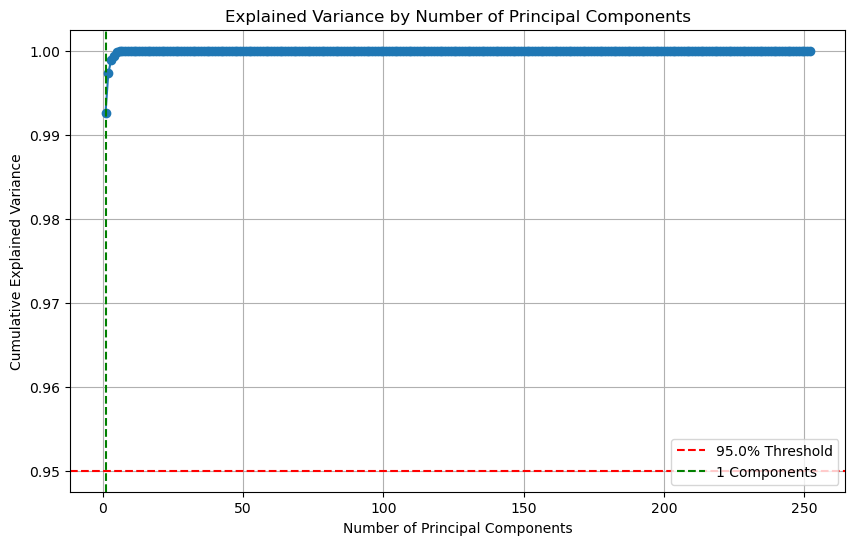

1

In [28]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


def plot_explained_variance(data, threshold=0.95):
    """
    Plots the cumulative explained variance for each principal component in PCA 
    and indicates the number of components needed to reach a given threshold.

    Parameters:
    - data: array-like, shape (n_samples, n_features)
        The input data for PCA.
    - threshold: float, default=0.95
        The cumulative explained variance threshold to reach.

    Returns:
    - num_components: int
        The minimum number of components needed to reach the given threshold.
    """
    # Run PCA
    pca = PCA()
    pca.fit(data)
    
    print(pca.explained_variance_ratio_)
    
    # Calculate cumulative explained variance
    cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
    
    print(cumulative_explained_variance[3])
    
    # Find the number of components that meet or exceed the threshold
    num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
    
    # Plot cumulative explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, 
             marker='o', linestyle='-')
    plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100}% Threshold')
    plt.axvline(x=num_components, color='g', linestyle='--', label=f'{num_components} Components')

    # Labels and title
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Number of Principal Components')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    return num_components

# Example usage with the sample dataset
plot_explained_variance(pipeline.feature_matrix, threshold=0.95)


In [69]:
from imblearn.over_sampling import BorderlineSMOTE
smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)

pipeline.feature_matrix, pipeline.labels = smote.fit_resample(
    pipeline.backup_feature_matrix, pipeline.backup_labels)

pca = PCA(n_components=75)

pipeline.feature_matrix = pca.fit_transform(pipeline.feature_matrix, pipeline.labels)

print(pipeline.backup_feature_matrix.shape)
print(pipeline.feature_matrix.shape)

print(pipeline.backup_labels.shape)
print(pipeline.labels.shape)

print(pca.get_feature_names_out())

pipeline.fitted_classifiers = {}

(5082, 252)
(8139, 75)
(5082,)
(8139,)
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8' 'pca9'
 'pca10' 'pca11' 'pca12' 'pca13' 'pca14' 'pca15' 'pca16' 'pca17' 'pca18'
 'pca19' 'pca20' 'pca21' 'pca22' 'pca23' 'pca24' 'pca25' 'pca26' 'pca27'
 'pca28' 'pca29' 'pca30' 'pca31' 'pca32' 'pca33' 'pca34' 'pca35' 'pca36'
 'pca37' 'pca38' 'pca39' 'pca40' 'pca41' 'pca42' 'pca43' 'pca44' 'pca45'
 'pca46' 'pca47' 'pca48' 'pca49' 'pca50' 'pca51' 'pca52' 'pca53' 'pca54'
 'pca55' 'pca56' 'pca57' 'pca58' 'pca59' 'pca60' 'pca61' 'pca62' 'pca63'
 'pca64' 'pca65' 'pca66' 'pca67' 'pca68' 'pca69' 'pca70' 'pca71' 'pca72'
 'pca73' 'pca74']


In [70]:
pipeline.fit_classifiers()

INFO:utils.ml:Fitting classifiers...
INFO:utils.ml:Fitting classifier: RandomForestClassifier0
INFO:utils.ml:Top 10 features for RandomForestClassifier0: [('color_moments_rgb_channel_0_std', 0.054100625179642564), ('gradient_direction_mean', 0.03650740865338034), ('var_rgb_channel_1', 0.024084828454778006), ('color_moments_lab_channel_1_skew', 0.02216311180696273), ('color_moments_rgb_channel_0_mean', 0.020707023687695583), ('color_moments_lab_channel_0_skew', 0.01955605397687244), ('gradient_direction_std', 0.018957814524078298), ('lbp_rad1_bins64_2', 0.018575432869657914), ('lbp_rad1_bins64_1', 0.016588707113038188), ('gradient_magnitude_mean', 0.016493929871498964)]
INFO:utils.ml:Fitted classifier: RandomForestClassifier0; Done in 8.977245569229126 seconds
INFO:utils.ml:Fitting classifier: RandomForestClassifier1
INFO:utils.ml:Top 10 features for RandomForestClassifier1: [('color_moments_rgb_channel_0_std', 0.052382999687906016), ('gradient_direction_mean', 0.038822575585306454), ('

In [71]:
# Load and extract features from the new dataset
new_loader = FactoryLoader(path=VAL_PATH, factory=pipeline.loader.get_factory(),
                           percentage=percent, batch_size=pipeline.batch_size)
new_feature_matrix, new_labels = pipeline.feature_strategy.run(new_loader.get_loader())

new_feature_matrix = np.nan_to_num(new_feature_matrix) # Impute nans
new_feature_matrix = pca.transform(new_feature_matrix) # Impute nans

# Store predictions in the class attribute
pipeline.predictions = {"GT": new_labels, }
for clf_name, clf in pipeline.fitted_classifiers.items():

    pipeline.predictions[clf_name] = clf.predict(new_feature_matrix)
    if pipeline.verbose:
        logger.info("Predictions made with classifier: %s", clf_name)


Processed 5/27 batches.
Processed 10/27 batches.
Processed 15/27 batches.
Processed 20/27 batches.
Processed 25/27 batches.


INFO:utils.utils:Predictions made with classifier: RandomForestClassifier0
INFO:utils.utils:Predictions made with classifier: RandomForestClassifier1
INFO:utils.utils:Predictions made with classifier: RandomForestClassifier2
INFO:utils.utils:Predictions made with classifier: RandomForestClassifier3
INFO:utils.utils:Predictions made with classifier: RandomForestClassifier4


Processed 27/27 batches.


INFO:utils.utils:Predictions made with classifier: RandomForestClassifier5
INFO:utils.utils:Predictions made with classifier: RandomForestClassifier6
INFO:utils.utils:Predictions made with classifier: RandomForestClassifier7
INFO:utils.utils:Predictions made with classifier: XGBClassifier8
INFO:utils.utils:Predictions made with classifier: XGBClassifier9
INFO:utils.utils:Predictions made with classifier: XGBClassifier10
INFO:utils.utils:Predictions made with classifier: XGBClassifier11
INFO:utils.utils:Predictions made with classifier: XGBClassifier12
INFO:utils.utils:Predictions made with classifier: XGBClassifier13
INFO:utils.utils:Predictions made with classifier: XGBClassifier14
INFO:utils.utils:Predictions made with classifier: XGBClassifier15
INFO:utils.utils:Predictions made with classifier: XGBClassifier16
INFO:utils.utils:Predictions made with classifier: XGBClassifier17
INFO:utils.utils:Predictions made with classifier: XGBClassifier18


In [72]:
df_pca = pd.DataFrame(data=pipeline.calculate_metrics(avg="weighted"))
df_pca = df_pca.T
df_pca

INFO:utils.ml:Metrics for classifier GT: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'kappa': 1.0}
INFO:utils.ml:Metrics for classifier RandomForestClassifier0: {'accuracy': 0.8181102362204724, 'precision': 0.8099237981593277, 'recall': 0.8181102362204724, 'f1': 0.812140207205229, 'kappa': 0.6673341830370709}
INFO:utils.ml:Metrics for classifier RandomForestClassifier1: {'accuracy': 0.8307086614173228, 'precision': 0.8241094396372608, 'recall': 0.8307086614173228, 'f1': 0.8247528306294989, 'kappa': 0.690392822964337}
INFO:utils.ml:Metrics for classifier RandomForestClassifier2: {'accuracy': 0.8125984251968504, 'precision': 0.8041926333599244, 'recall': 0.8125984251968504, 'f1': 0.8064114016856745, 'kappa': 0.6571663195909497}
INFO:utils.ml:Metrics for classifier RandomForestClassifier3: {'accuracy': 0.8125984251968504, 'precision': 0.8022426976996185, 'recall': 0.8125984251968504, 'f1': 0.8042287308284793, 'kappa': 0.6548976087393361}
INFO:utils.ml:Metrics for classif

cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated with a value
cannot access local variable 'report' where it is not associated

,accuracy,precision,recall,f1,kappa
GT,1.000000,1.000000,1.000000,1.000000,1.000000
RandomForestClassifier0,0.818110,0.809924,0.818110,0.812140,0.667334
RandomForestClassifier1,0.830709,0.824109,0.830709,0.824753,0.690393
RandomForestClassifier2,0.812598,0.804193,0.812598,0.806411,0.657166
RandomForestClassifier3,0.812598,0.802243,0.812598,0.804229,0.654898
RandomForestClassifier4,0.821260,0.810954,0.821260,0.813582,0.671656
RandomForestClassifier5,0.814961,0.804806,0.814961,0.806240,0.658793
RandomForestClassifier6,0.825984,0.817699,0.825984,0.818999,0.680597
RandomForestClassifier7,0.825197,0.816156,0.825197,0.816547,0.677054
XGBClassifier8,0.840157,0.831622,0.840157,0.834012,0.707179


In [76]:
confusion_matrix(pipeline.predictions["GT"], pipeline.predictions["XGBClassifier15"])

array([[428,  53,  17],
       [ 53, 608,  17],
       [ 35,  24,  35]], dtype=int64)